In [1]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import seaborn as sns

In [2]:
anime = pd.read_csv('anime\\anime.csv')
rating = pd.read_csv('anime\\rating.csv')

In [40]:
anime.sort_values(['rating'], axis=0, ascending=False)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [4]:
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [5]:
rating['rating'].value_counts()

rating
 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

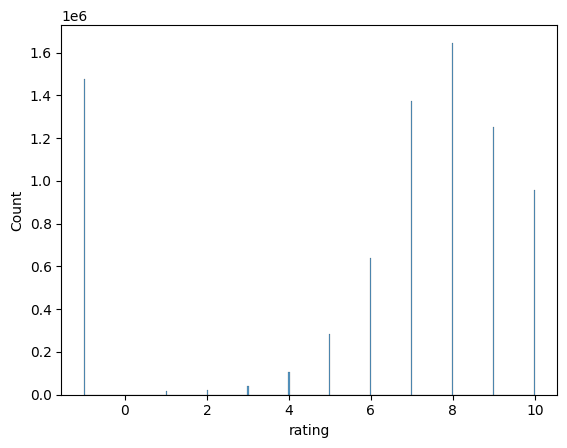

In [6]:
sns.histplot(data=rating, x='rating')

In [7]:
# Определение формата данных
reader = Reader(rating_scale=(-1, 10))  # предположим, что оценки от 1 до 5
data = Dataset.load_from_df(rating[['user_id', 'anime_id', 'rating']], reader)

# Разделение на обучающую и тестовую выборки
trainset, testset = train_test_split(data, test_size=0.2)

In [8]:
# Обучение модели
model = SVD()
model.fit(trainset)

# Оценка модели
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 2.1271
RMSE: 2.127089896507809


In [100]:
person = pd.DataFrame({'user_id': [1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000], 'anime_id': [30276, 21, 20, 813, 5114, 11061, 9969, 1535, 918, 2904, 28977, 1575, 1], 'rating': [8, 7, 7, 7, 8, 7, 6, 8, 6, 5, 5, 5, 7]})
person

,user_id,anime_id,rating
0,1000000,30276,8
1,1000000,21,7
2,1000000,20,7
3,1000000,813,7
4,1000000,5114,8
5,1000000,11061,7
6,1000000,9969,6
7,1000000,1535,8
8,1000000,918,6
9,1000000,2904,5


In [101]:
new_rating = pd.concat([rating, person], ignore_index=True)
new_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813745,1000000,918,6
7813746,1000000,2904,5
7813747,1000000,28977,5
7813748,1000000,1575,5


In [72]:
anime[anime['name'] == 'Dragon Ball Z']

,anime_id,name,genre,type,episodes,rating,members
206,813,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,291,8.32,375662


In [82]:
s = 'e'
for name in anime['name'].values:
    if name.lower().startswith(s.lower()):
        print(name)

Evangelion: 2.0 You Can (Not) Advance
Eve no Jikan
Eve no Jikan (Movie)
Evangelion: 1.0 You Are (Not) Alone
Eureka Seven
ef: A Tale of Melodies.
ef: A Tale of Memories.
Elsword: El Lady
Eyeshield 21
Eikoku Koi Monogatari Emma: Molders-hen
Ergo Proxy
Elfen Lied
Eikoku Koi Monogatari Emma
Evangelion: 3.0 You Can (Not) Redo
ef: A Tale of Memories. - Recollections
El Hazard: The Magnificent World
Erementar Gerad
ef: A Tale of Melodies. - Prologue
Elfen Lied Special
El Cazador de la Bruja
Egomama
ef: A Tale of Memories. - Prologue
Eureka Seven: Pocket ga Niji de Ippai
Eikoku Koi Monogatari Emma: Intermission
Escaflowne
Elf wo Karu Mono-tachi
Elf wo Karu Mono-tachi II
El Hazard: The Wanderers
Eureka Seven: Navigation ray=out
Etotama
El Hazard 2: The Magnificent World
El Hazard: The Alternative World
Eat-Man &#039;98
Eyeshield 21: Jump Festa 2005 Special
Eureka Seven AO
eX-Driver
eX-Driver the Movie
Eiyuu Densetsu: Sora no Kiseki The Animation
Emblem Take 2
Eyeshield 21: Maboroshi no Golden B

In [98]:
# Функция для получения рекомендаций
def get_recommendations(user_id, num_recommendations=10):
    book_ids = new_rating['anime_id'].unique()
    user_ratings = new_rating[new_rating['user_id'] == user_id]['anime_id']
    
    # Предсказать оценки для всех книг
    predictions = []
    for book_id in book_ids:
        if book_id not in user_ratings.values:
            pred = model.predict(user_id, book_id)
            predictions.append((book_id, pred.est))
    
    # Сортировка по оценке
    recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:num_recommendations]
    # Получение информации о книгах
    recommended_books = anime[anime['anime_id'].isin([x[0] for x in recommendations])]
    recommended_books['predicted_rating'] = [x[1] for x in recommendations]
    return recommended_books

In [102]:
N = 1000000
recommended_books = get_recommendations(user_id=N)
recommended_books

C:\Users\Gleb\AppData\Local\Temp\ipykernel_14352\2299946405.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_books['predicted_rating'] = [x[1] for x in recommendations]


,anime_id,name,genre,type,episodes,rating,members,predicted_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,7.826766
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,7.805512
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,7.745181
29,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962,7.472811
30,245,Great Teacher Onizuka,"Comedy, Drama, School, Shounen, Slice of Life",TV,43,8.77,268487,7.456229
38,19,Monster,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,8.72,247562,7.445836
53,6114,Rainbow: Nisha Rokubou no Shichinin,"Drama, Historical, Seinen, Thriller",TV,26,8.64,139474,7.440954
69,12431,Uchuu Kyoudai,"Comedy, Sci-Fi, Seinen, Slice of Life, Space",TV,99,8.59,72958,7.407758
111,2921,Ashita no Joe 2,"Drama, Sports",TV,47,8.48,6259,7.386658
128,5420,Kemono no Souja Erin,"Drama, Fantasy",TV,50,8.45,36751,7.382445


In [103]:
anime[anime['anime_id'].isin(new_rating[new_rating['user_id'] == N].sort_values(['rating'], axis=0, ascending=False).head(10)['anime_id'])]

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
23,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
206,813,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,291,8.32,375662
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
